In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
board_size = 30

In [98]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
    def forward(self, x):
        return self.layers(x)

In [108]:
mlp = MLP()
# mlp = torch.load("model")
# mlp.train()
losses = []
running_loss = 1

In [117]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [134]:
for epoch in range(100):
    dataset, moves, length = game_sim()
#     print(length)
    
    batch = torch.zeros(1, 1, 30, 30)
    
    for sample in dataset:
        board = torch.zeros(board_size, board_size)
        for number, i in enumerate(sample):
            board[i] = ((number + 1)/len(sample))
        batch = torch.cat([batch, board.view(1, 1, 30, 30)], dim=0)
    batch = torch.cat((batch[:0], batch[0+1:])) # remove first row
    optimizer.zero_grad()
    outputs = mlp(batch) #(length, moves)
    labels = torch.ones(length, 1)
    labels = labels * torch.tensor((length/900.0))
    loss = loss_function(labels, outputs)
    running_loss = (running_loss * 0.9) + (loss.item() * 0.1)
    print(running_loss)
    losses.append(running_loss)
    loss.backward()
    optimizer.step()
        


0.0016251028541031047
0.001661855413091412
0.0017533884814282337
0.0016350618601836337
0.001497092556623525
0.0014151845448195845
0.001343384519923545
0.0012297344646933156
0.0016707028676196168
0.001693162207953563
0.00153337923349704
0.001425922235756135
0.0015278412337160253
0.0014422640598056745
0.0013956469593465804
0.00143336864245121
0.0013053480662512309
0.0015567454576960974
0.0016015927880306637
0.0020966504657387373
0.002145895260232953
0.001969410925406904
0.0017813906625802566
0.0018930617425273583
0.0017909587002632671
0.0016239797596658253
0.0014880928877782063
0.0013904729410484048
0.0015240972691677164
0.0013967564671296688
0.001287465044790549
0.0012259073522656052
0.0011714004590911915
0.0012564024646031782
0.0013729529796345167
0.0016411492442312658
0.001563700090312763
0.001516516779964093
0.0013739725876431696
0.001494370632938835
0.001715440581766331
0.001546747628135396
0.0022471214249279317
0.0020312875412487772
0.001839825293303508
0.001719964061300959
0.00160

In [66]:
# torch.save(mlp, "model")

In [129]:
snake = [(14, 14)]
mlp.eval()
while True:
    while True:
        apple = (int(np.random.rand(1) * board_size), int(np.random.rand(1) * board_size))
        if apple not in snake:
            break
    pathington = BFS(snake[0], apple, snake, 1)
    if len(pathington) == 0:
        print(len(snake))
        break
    lowest_index = 0
    lowest_score = -10000
    for i, path1 in enumerate(pathington):
        board = torch.zeros(board_size, board_size)
        for number, point in enumerate(path1):
            board[point] = ((number + 1)/len(path1))
        board = board.view(-1, 900)
        score = mlp(board.view(1, 1, 30, 30))
        if score > lowest_score:
            lowest_score = score
            lowest_index = i
    print(lowest_score)
    path = pathington[lowest_index]
    path = path + snake
    snake.append((0, 0))
    for i, piece in enumerate(snake):
        snake[i] = path[i]
mlp.train()

tensor([[0.1437]], grad_fn=<AddmmBackward0>)
tensor([[0.1391]], grad_fn=<AddmmBackward0>)
tensor([[0.1437]], grad_fn=<AddmmBackward0>)
tensor([[0.1441]], grad_fn=<AddmmBackward0>)
tensor([[0.1440]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1360]], grad_fn=<AddmmBackward0>)
tensor([[0.1298]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1442]], grad_fn=<AddmmBackward0>)
tensor([[0.1424]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1438]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1426]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1439]], grad_fn=<AddmmBackward0>)
tensor([[0.1436]], grad_fn=<AddmmBackward0>)
tensor([[0

MLP(
  (layers): Sequential(
    (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (16): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_

In [41]:
# # training from dataset
# f = open("dataset.json", "r")
# beeg = f.readlines()

# for epoch in range(100):
#     batch = torch.zeros(1, 900)
#     labels = torch.ones(32, 1)
#     for batchington in range(32):
#         rand = int(np.random.rand() * len(beeg))
#         sample_str = beeg[rand]
#         sample = sample_str.split(" ")
#         int_sample = []
#         length = int(sample.pop(0))
#         labels[batchington] = length/900.0
#         sample.pop(len(sample) - 1)
#         for i in sample:
#             int_sample.append(int(i))
#         tensor_sample = torch.tensor(int_sample)
#         tensor_sample = tensor_sample.view(-1, 2)
#         board = torch.zeros(board_size, board_size)
#         for i in tensor_sample:
#             pos = (i[0].item(), i[1].item())
#             board[pos] = 1
#         batch = torch.cat([batch, board.view(-1, 900)], dim=0)
#     batch = torch.cat((batch[:0], batch[0+1:])) # remove first row
#     optimizer.zero_grad()
#     outputs = mlp(batch) #(length, moves)
#     loss = loss_function(outputs, labels)
#     print(loss.item())
#     losses.append(loss.item())
#     loss.backward()
#     optimizer.step()

In [160]:
board = torch.zeros(board_size, board_size)
board[(14, 14)] = 1
innington = board.view(1, 900)
mlp.eval()
logits = mlp(innington)
length = logits[0][0].item() * 900
print(length)
mlp.train()

126.99951231479645


MLP(
  (layers): Sequential(
    (0): Linear(in_features=900, out_features=1024, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=1024, out_features=1024, bias=True)
    (10): ReLU()
    (11): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=1024, out_features=1024, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Linear(in_features=1024, out_features=1024, bias=True)
    (16): ReLU()
    (17): BatchNorm1d(1024, ep

In [159]:
# best loss:   0.00207378133200109
# 0.003948253579437733
# 0.0002190066152252257
# 0.00013125113036949188
# 0.0016721078427508473
# 0.0006189789273776114
# 4.9065616622101516e-05
# 7.81641501816921e-05
# 0.009134437888860703
# 2.2606200218433514e-05

# this is probably from just blindly predicting 100-130

174/900

0.19333333333333333

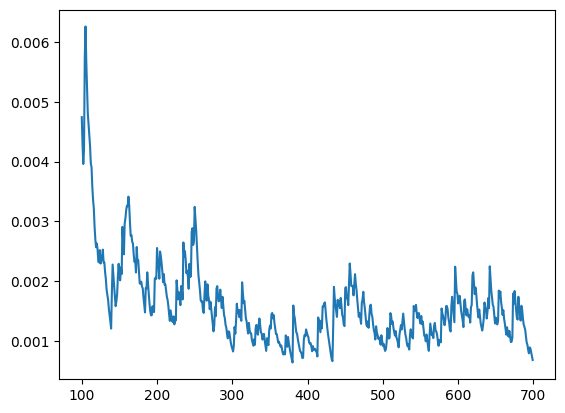

In [135]:
smooth = 1
x = np.arange(len(losses)/smooth)
y = torch.tensor(losses).view(smooth, -1).mean(0)
plt.plot(x[100:], y[100:])


In [7]:
def game_sim():
    snake = [(14, 14)]
    dataset = []
    moves = 0
    while True:
        dataset.append(snake.copy())
        while True:
            apple = (int(np.random.rand(1) * board_size), int(np.random.rand(1) * board_size))
            if apple not in snake:
                break
        pathington = BFS(snake[0], apple, snake, 1)
        if len(pathington) == 0:
            return dataset, moves, len(snake)
        path = pathington[0]
        moves += len(path)
        path = path + snake
        snake.append((0, 0))
        for i, piece in enumerate(snake):
            snake[i] = path[i]

In [8]:
def get_neighbors(p, snake, distance):
    reduced = snake.copy()
    for i in range(distance):
        if len(reduced) > 0:
            reduced.remove(reduced[len(reduced) - 1])
    if p[0] + 1 < board_size and (p[0] + 1, p[1]) not in reduced:
        top = (p[0] + 1, p[1])
    else:
        top = None
    if p[0] - 1 > -1 and (p[0] - 1, p[1]) not in reduced:
        bottom = (p[0] - 1, p[1])
    else:
        bottom = None
    if p[1] + 1 < board_size and (p[0], p[1] + 1) not in reduced:
        right = (p[0], p[1] + 1)
    else:
        right = None
    if p[1] - 1 > -1 and (p[0], p[1] - 1) not in reduced:
        left = (p[0], p[1] - 1)
    else:
        left = None
    return top, right, bottom, left

In [9]:
class Node:
    def __init__(self, value, depth, path, h): # depth is inherently g score
        self.value = value
        self.path = path + [value]
        self.depth = depth
        self.h = h
    def __eq__(self, other):
        if self.value == other.value and self.depth == other.depth:
            return True
        else:
            return False

In [10]:
def BFS(start, end, snake, n):
    paths = []
    tree = [Node(start, 0, [], euclidian(start, end))]
    while len(tree) != 0:
        min_val = 1000000
        min_node = None
        for i in tree:
            if i.depth + i.h < min_val:
                min_val = i.depth + i.h
                min_node = i
        current = min_node
        if current.value == end:
            paths.append(list(reversed(current.path)))
        if len(paths) == n:
            return paths
        neighbors = get_neighbors(current.value, snake, current.depth)
        for neighbor in neighbors:
            if neighbor is not None:
                node = Node(neighbor, current.depth + 1, current.path, euclidian(neighbor, end))
                if node not in tree and neighbor not in current.path:
                    tree.append(node)
        tree.remove(current)
    return paths

In [11]:
def euclidian(a, b):
    x = abs(a[0] - b[0])
    y = abs(a[1] - b[1])
    return np.sqrt(x**2 + y**2)